# Part II - (Ford GoBike System Data (January - April, 2019)
## by (Umar Abubakar)

## Investigation Overview

> The investigation of Ford GoBike System Data was focused on the duration of rides and those features such as distance that affect the duration of rides and different periods (time of day, day of the week, and month) that most rides are taken by different groups of users.

## Dataset Overview

> The original dataset provided contained rides taken during the month of February 2019. Effort was made to gather additional data for the remaining months of 2019. Due to Ford GoBike website being offline and other repositories not having data for the months of May and beyond, we were only able to gather additional data for the months of January, March and April of 2019 bringing the number of months of data to four (4).
Additional data was gathered from (https://s3.amazonaws.com/fordgobike-data/index.html).

> The dataset contains 870904 rides taken during the months of January to April of 2019 with 16 attributes namely:
(duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set_style('darkgrid')

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('bike_clean.csv', parse_dates=['start_time', 'end_time'])

In [3]:
#function to convert columns of a dataframe to any type
def to_type(df, cols, d_type='str'):
    ''' The function takes as input a dataframe, a list of columns and the keyword argument d_type which specifies the type to convert to. '''
    for col in cols:
        df[col] = df[col].astype(d_type)

# columns to convert to category type
cat_cols = ['user_type', 'member_gender']

#function call to convert list of colulmns to category type
to_type(bike, cat_cols, d_type='category')

# creating a new dataframe that contains only the features required for our analysis
bike_df = bike[['duration_sec', 'start_time', 'end_time', 'user_type', 'member_gender', 'age', 'distance', 'day_of_week', 'month', 'time_of_day']]

## Duration and Distance of Rides from January to April

* The duration of rides declined between January and February after which the duration of rides increased from February to April.

* Distance followed a similar trend as duration with a minor difference. Distance only increased from February to March followed by a sharp decrease between March and April.

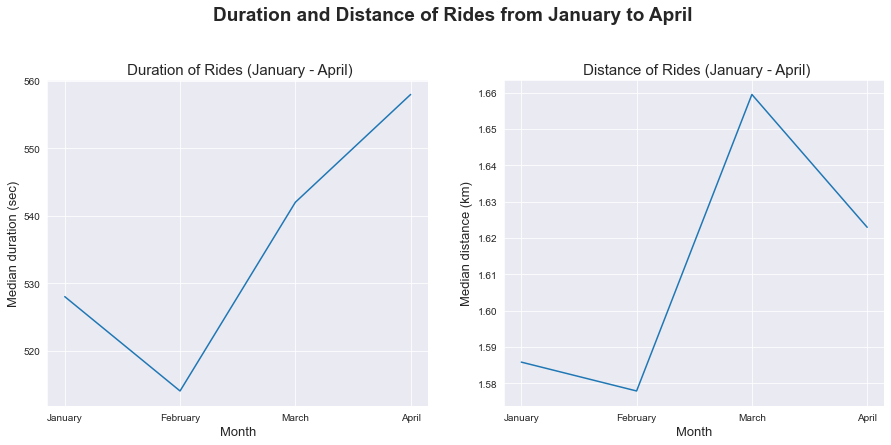

In [4]:
# setting figure size
plt.figure(figsize=[15, 6])

# defining subplot row, column and axis for the first plot
plt.subplot(1, 2, 1)

# Calculating the median duration and distance per month and storing the results in new dataframes.
dur = pd.DataFrame(bike_df.resample('M', on = 'start_time')['duration_sec'].median())
dist = pd.DataFrame(bike_df.resample('M', on = 'start_time')['distance'].median())

#line plot with month on the x-axis and duration on the y-axis
plt.plot(dur.index.month_name(), dur.duration_sec)
plt.xlabel('Month', fontdict={'fontsize':13})
plt.ylabel('Median duration (sec)', fontdict={'fontsize':13})
plt.title(' Duration of Rides (January - April)', fontdict={'fontsize':15})

# defining subplot row, column and  axis for the second plot
plt.subplot(1, 2, 2)
plt.plot(dist.index.month_name(), dist.distance)
plt.xlabel('Month', fontdict={'fontsize':13})
plt.ylabel('Median distance (km)', fontdict={'fontsize':13})
plt.title(' Distance of Rides (January - April)', fontdict={'fontsize':15})

#setting the main figure title
plt.suptitle('Duration and Distance of Rides from January to April', y = 1.05, fontsize=19, weight=("bold"))
plt.show()



## Proportion and Duration of Rides by User Type and Gender Type

* The plots show that most of the rides are taken by males and that Females and Other (unspecified gender) take the trips with the longest duration despite the percentage of male members being larger.

* Despite the percentage of rides taken by subscribers being larger than those taken by customers, customers take trips with longer duration than subscribers.

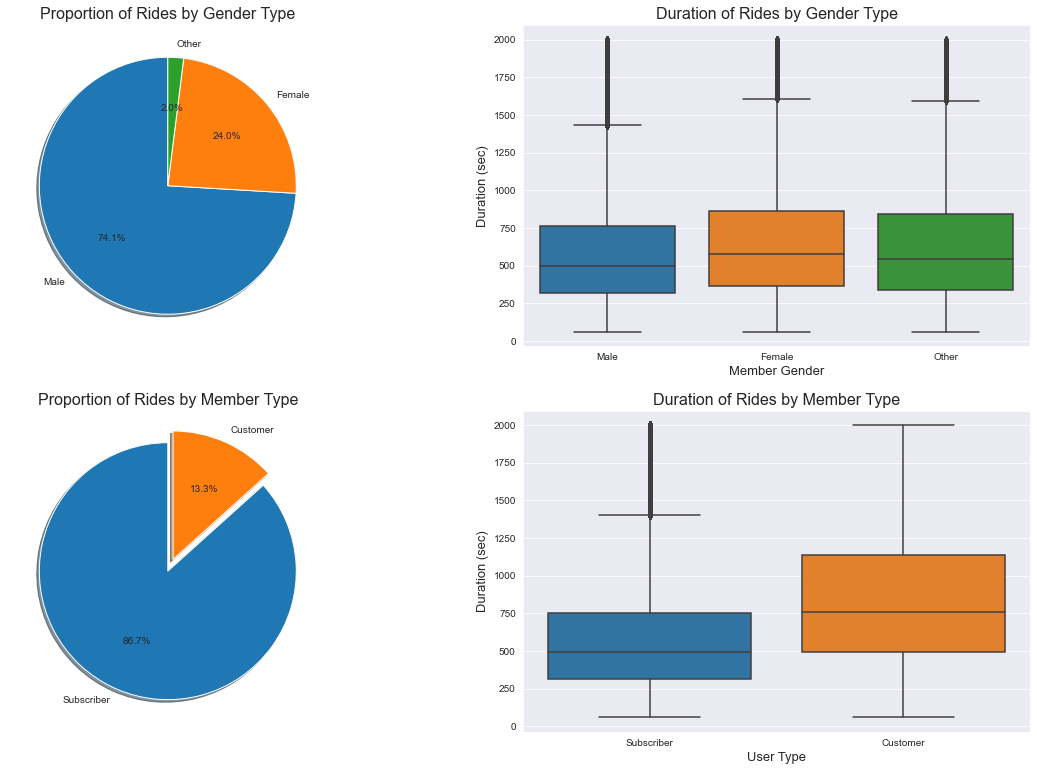

In [5]:
# setting figure size
plt.figure(figsize=[20, 13])
# defining subplot row, column and axis for the first plot
plt.subplot(2, 2, 1)
# pie chart labels
label = ['Male', 'Female', 'Other']
# counting the number of each gender type in the dataset
gender_counts = bike_df['member_gender'].value_counts()
# plotting a pie chart to show the percentage of all gender types in the dataset
plt.pie(gender_counts, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Proportion of Rides by Gender Type', fontdict={'fontsize':16})

# defining subplot row, column and  axis for the second plot
plt.subplot(2, 2, 2)
#creating a dataframe that contains rides with duration that is equal to or less than 2000 seconds
dur_df = bike_df[bike_df['duration_sec'] <= 2000]
# storing the index of a series object that contains the counts of each gender type in the gen_ind variable
gen_ind = dur_df['member_gender'].value_counts().index
# creating a boxplot with member_gender on the x-axis and duration_sec on the y-axis and ordered using gen_ind
sb.boxplot(data=dur_df, x='member_gender', y='duration_sec', order=gen_ind)
plt.xlabel('Member Gender', fontdict={'fontsize':13})
plt.ylabel('Duration (sec)', fontdict={'fontsize':13})
plt.title('Duration of Rides by Gender Type', fontdict={'fontsize':16})

# defining subplot row, column and  axis for the third plot
plt.subplot(2, 2, 3)
# pie chart labels
label = ['Subscriber', 'Customer']
# creating a series object that contains the count of each user_type 
type_counts = bike_df['user_type'].value_counts()
# plotting a pie chart that shows the percentage of each user_type
plt.pie(type_counts, labels=label, autopct='%1.1f%%', explode=[0,0.1], shadow=True, startangle=90)
plt.title('Proportion of Rides by Member Type', fontdict={'fontsize':16})

# defining subplot row, column and  axis for the fourth plot
plt.subplot(2, 2, 4)

# Creating a series object that contains the index of the counts of each user type
user_ind = dur_df['user_type'].value_counts().index
# creating a boxplot with user_type on the x-axis and duration_sec on the y-axis ordered using the user_ind variable
sb.boxplot(data=dur_df, x='user_type', y='duration_sec', order=user_ind)
plt.ylabel('Duration (sec)', fontdict={'fontsize':13})
plt.xlabel('User Type', fontdict={'fontsize':13})
plt.title('Duration of Rides by Member Type', fontdict={'fontsize':16})

plt.show()

## Duration of Rides by User Type at Different Periods

* Between Ford GoBike customers and subscribers, customers tend to take the longest rides at all times of the day, on all days of the week.

* A similar trend for the duration of rides per month was also observed.


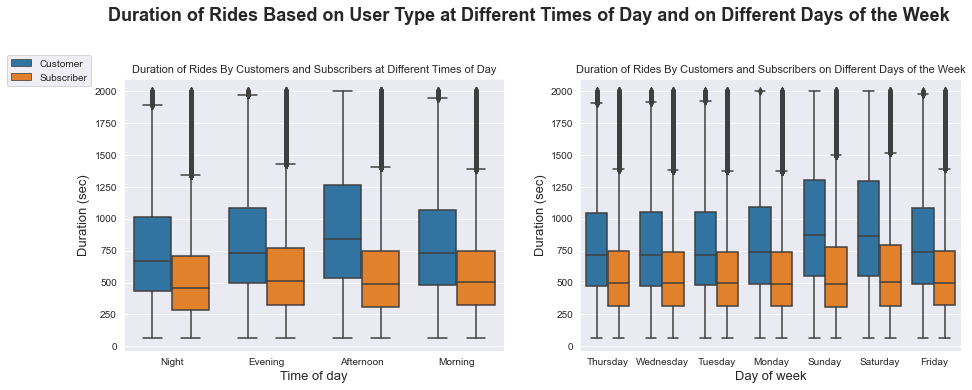

In [6]:
# creating a condition to be used to select trips with duration and distance less than or equal to 2000 seconds and 12 km respectively. 
mask = (bike_df.distance <= 12) & (bike_df.duration_sec <= 2000)
# creating a new df with trips that have duration and distance of about 2000 seconds and 12 km respectively
no_outlier_df = bike_df[mask] 

# creating the first plot: first row, first column
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = [15,5])
sb.boxplot(data=no_outlier_df, x='time_of_day', y='duration_sec', hue='user_type', ax=ax[0])
ax[0].set_xlabel('Time of day', fontsize=13)
ax[0].set_ylabel('Duration (sec)', fontsize=13)
ax[0].set_title('Duration of Rides By Customers and Subscribers at Different Times of Day', fontsize=11)
ax[0].legend(loc = 6, bbox_to_anchor = (-0.32, 1.03))

# creating the second plot: first row, second column
sb.boxplot(data=no_outlier_df, x='day_of_week', y='duration_sec', hue='user_type', ax=ax[1])
ax[1].set_xlabel('Day of week', fontsize=13)
ax[1].set_ylabel('Duration (sec)', fontsize=13)
ax[1].set_title('Duration of Rides By Customers and Subscribers on Different Days of the Week', fontsize=11)
ax[1].legend().set_visible(False)


# setting the main figure title
plt.suptitle("Duration of Rides Based on User Type at Different Times of Day and on Different Days of the Week", y = 1.08, fontsize=18,weight=("bold"))
plt.show()

## Duration of Rides by Gender Type at Different Periods

* Between Males, Females, and Other (Unspecified gender), females take the longest rides followed by Other and Males at all times of day, on all days of the week. Males take rides with the shortest durations.

* A similar trend for the duration of rides per month was also observed.

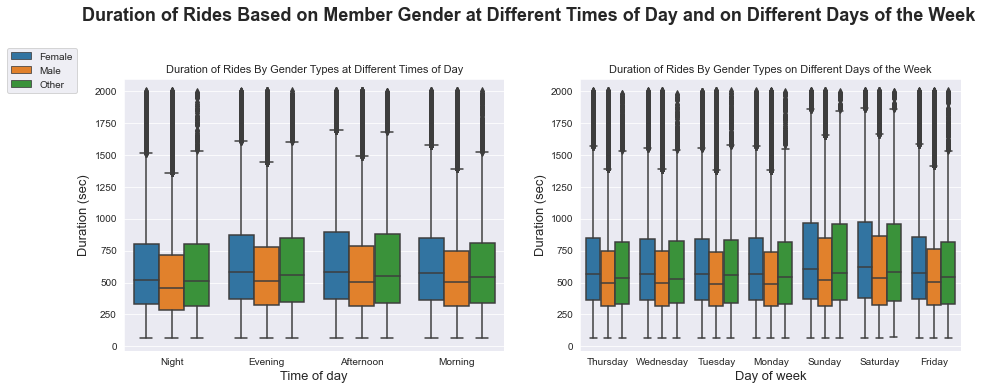

In [7]:
# creating the first plot: first row, first column
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = [15,5])

# creating the first plot: first row, first column
sb.boxplot(data=no_outlier_df, x='time_of_day', y='duration_sec', hue='member_gender', ax=ax[0])
ax[0].set_xlabel('Time of day', fontsize=13)
ax[0].set_ylabel('Duration (sec)', fontsize=13)
ax[0].set_title('Duration of Rides By Gender Types at Different Times of Day', fontsize=11)
ax[0].legend(loc = 6, bbox_to_anchor = (-0.32, 1.03))

# creating the fourth plot: first row, second column
sb.boxplot(data=no_outlier_df, x='day_of_week', y='duration_sec', hue='member_gender', ax=ax[1])
ax[1].set_xlabel('Day of week', fontsize=13)
ax[1].set_ylabel('Duration (sec)', fontsize=13)
ax[1].set_title('Duration of Rides By Gender Types on Different Days of the Week', fontsize=11)
ax[1].legend().set_visible(False)

# setting the main figure title
plt.suptitle("Duration of Rides Based on Member Gender at Different Times of Day and on Different Days of the Week", y = 1.08, fontsize=18,weight=("bold"))
plt.show()

## Distance vs. Duration of Rides Between Gender Types

* The plots show that there is a similar trend for all gender types for Ford GoBike members and that the number of males taking short distance rides is larger than that of females and Other (unspecified gender).



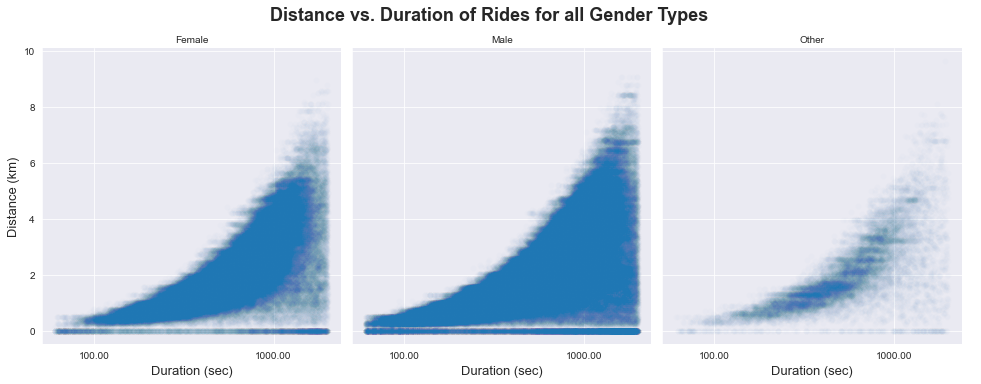

In [8]:
# Creating the seaborn Facetgrid object
g = sb.FacetGrid(data=no_outlier_df, col='member_gender',col_wrap=3, height=5, aspect=0.9)
# mapping the plot variables onto the facetgrid object
g.map(sb.scatterplot, 'duration_sec', 'distance', alpha=0.01)
g.set(xscale='log')
g.set_xlabels('Duration (sec)', fontsize=13)
g.set_ylabels('Distance (km)', fontsize=13)
g.set_titles('{col_name}')
g.add_legend()
# setting the main figure title
g.fig.suptitle('Distance vs. Duration of Rides for all Gender Types', y = 1.05, fontsize=18,weight=("bold"))
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(lambda y, p: f'{y*1:.2f}')

In [10]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt
